In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
L = 1  # Length of the string
c = 1  # Wave speed
A = 1  # Amplitude

# Discretize space and time
x = np.linspace(0, L, 500)  # Spatial points
t = np.linspace(0, 2, 200)  # Time points

In [2]:
# Normal mode functions
def normal_mode(n, x, t, c, A):
    """Compute the n-th normal mode of the wave."""
    omega_n = n * np.pi * c / L  # Angular frequency
    X_n = np.sin(n * np.pi * x / L)  # Spatial part
    T_n = np.cos(omega_n * t)  # Temporal part
    return A * np.outer(X_n, T_n)  # Combine spatial and temporal parts

# Generate wave data for modes n=1, 2, 3
u1 = normal_mode(1, x, t, c, A)
u2 = normal_mode(2, x, t, c, A)
u3 = normal_mode(3, x, t, c, A)

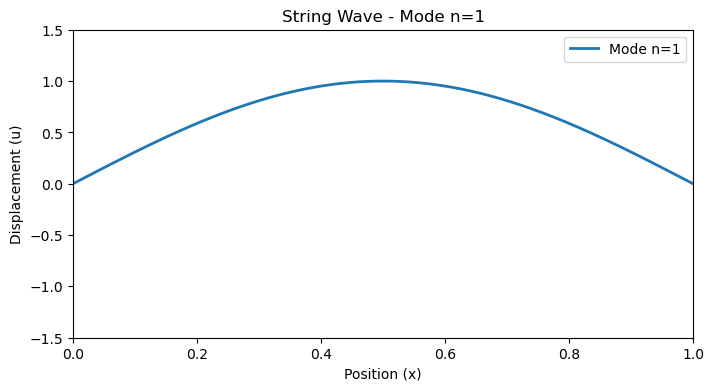

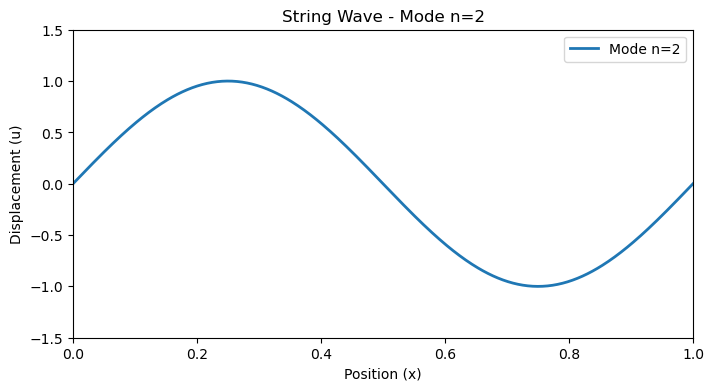

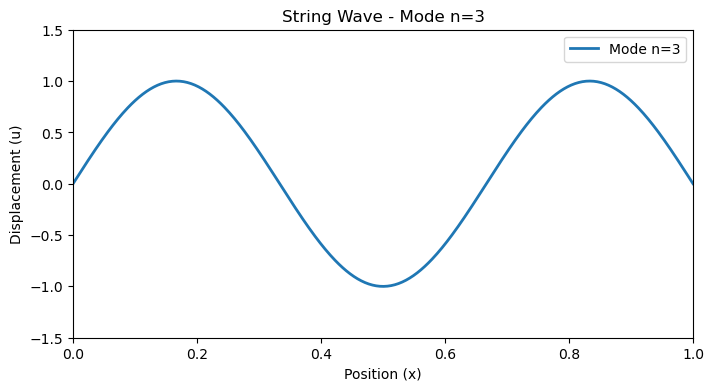

In [3]:
# Plotting and animation
def animate_wave(u, mode):
    """Animate the string wave for a given mode."""
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlim(0, L)
    ax.set_ylim(-1.5 * A, 1.5 * A)
    ax.set_title(f"String Wave - Mode n={mode}")
    ax.set_xlabel("Position (x)")
    ax.set_ylabel("Displacement (u)")
    
    # Create a line object for the wave
    line, = ax.plot(x, u[:, 0], lw=2, label=f"Mode n={mode}")
    ax.legend()

    # Update function for the animation
    def update(frame):
        line.set_ydata(u[:, frame])  # Update the y-data for the line
        return line,

    # Create the animation
    anim = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    plt.show()

# Animate each mode
animate_wave(u1, 1)  # Mode n=1
animate_wave(u2, 2)  # Mode n=2
animate_wave(u3, 3)  # Mode n=3

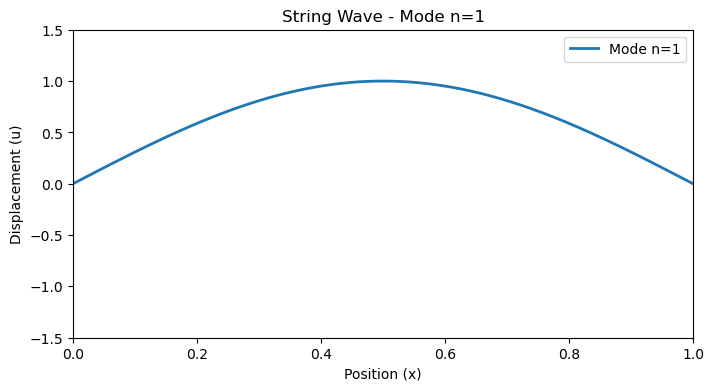

In [6]:
# Plotting and animation
def animate_wave(u, mode, save=False):
    """Animate the string wave for a given mode."""
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlim(0, L)
    ax.set_ylim(-1.5 * A, 1.5 * A)
    ax.set_title(f"String Wave - Mode n={mode}")
    ax.set_xlabel("Position (x)")
    ax.set_ylabel("Displacement (u)")
    
    # Create a line object for the wave
    line, = ax.plot(x, u[:, 0], lw=2, label=f"Mode n={mode}")
    ax.legend()

    # Update function for the animation
    def update(frame):
        line.set_ydata(u[:, frame])  # Update the y-data for the line
        return line,

    # Create the animation
    anim = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    
    # Save the animation if requested
    if save:
        anim.save(f"wave_animation_mode_{mode}.mp4", writer="ffmpeg", fps=30)
    
    plt.show()

# Animate each mode
animate_wave(u1, 1, save=False)  # Mode n=1
#animate_wave(u2, 2, save=False)  # Mode n=2
# animate_wave(u3, 3, save=False)  # Mode n=3